In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Завантаження та підготовка даних
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [29]:
# Перетворення даних
train_images = train_images / 255.0
test_images = test_images / 255.0

In [30]:
# Побудова моделі нейронної мережі
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [31]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# Вивід інформації про модель
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [33]:
# Навчання моделі з аугментацією даних
history = model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 50s 65ms/step - loss: 0.5213 - accuracy: 0.8118 - val_loss: 0.3860 - val_accuracy: 0.8627
Epoch 2/20
750/750 [==============================] - 50s 67ms/step - loss: 0.3488 - accuracy: 0.8728 - val_loss: 0.3303 - val_accuracy: 0.8827
Epoch 3/20
750/750 [==============================] - 47s 63ms/step - loss: 0.3005 - accuracy: 0.8908 - val_loss: 0.2900 - val_accuracy: 0.8962
Epoch 4/20
750/750 [==============================] - 48s 64ms/step - loss: 0.2681 - accuracy: 0.9030 - val_loss: 0.3025 - val_accuracy: 0.8898
Epoch 5/20
750/750 [==============================] - 49s 65ms/step - loss: 0.2399 - accuracy: 0.9126 - val_loss: 0.2614 - val_accuracy: 0.9046
Epoch 6/20
750/750 [==============================] - 51s 67ms/step - loss: 0.2211 - accuracy: 0.9180 - val_loss: 0.2722 - val_accuracy: 0.9029
Epoch 7/20
750/750 [==============================] - 48s 63ms/step - loss: 0.1972 - accuracy: 0.9271 - val_loss: 0.2582 - val_accuracy:

In [34]:
# Прогнозування класів для тестового набору даних
predictions = model.predict(test_images)

313/313 [==============================] - 3s 10ms/step


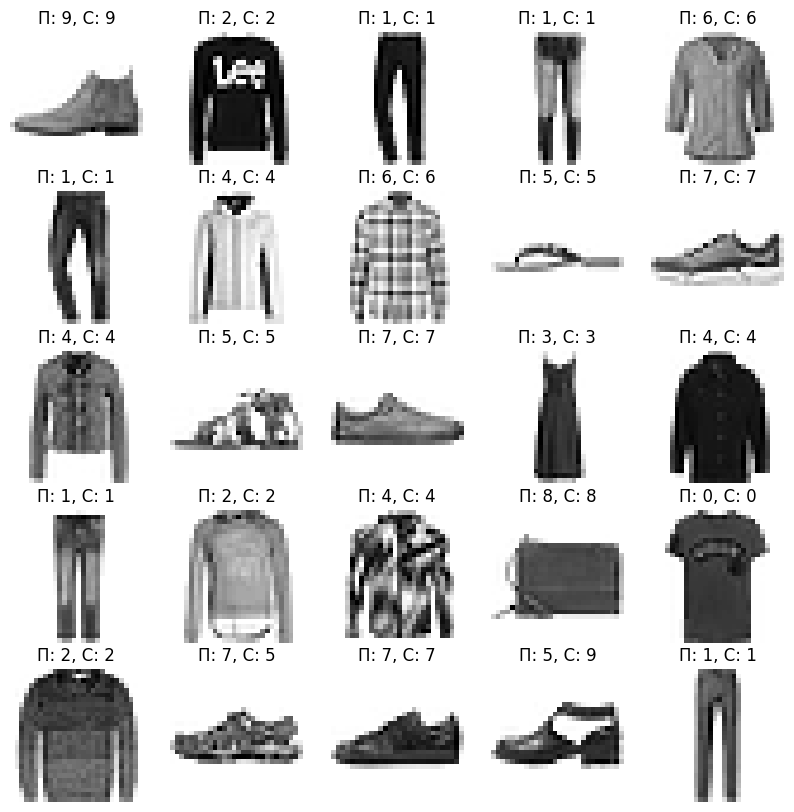

In [35]:
# Відображення прикладів тестових зображень та їхніх прогнозованих класів
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    plt.title(f"П: {predicted_label}, С: {true_label}")
    plt.axis('off')

plt.show()

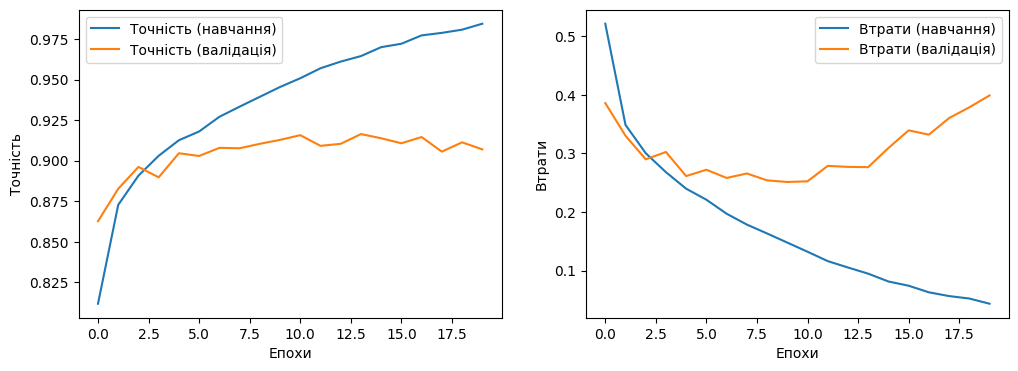

In [36]:
# Відображення графіків навчання
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність (навчання)')
plt.plot(history.history['val_accuracy'], label='Точність (валідація)')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати (навчання)')
plt.plot(history.history['val_loss'], label='Втрати (валідація)')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()

plt.show()

In [37]:
# Оцінка точності на тестовому наборі даних
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels)
print("\nТочність на тестовому наборі даних:", test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.4272 - accuracy: 0.9061

Точність на тестовому наборі даних: 0.9060999751091003
